# Application Development Summative

## Solar Plant Data

The first step in the process is to train a machine learning model using data collected from the solar and wind farms. This notebook will focus on the solar data.

In [85]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [86]:
%matplotlib inline

In [87]:
#read in the solar data into a dataframe
solar_data = pd.read_csv(r"C:\Users\Admin\Documents\AIIP\AppDev\Summative\solar_generation_data.csv", encoding='utf8')

In [88]:
solar_data.tail()

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
360,Dec,27,101°,83°,26.4,8,NaN,8.74
361,Dec,28,102°,84°,25.8,8,NaN,8.54
362,Dec,29,104°,83°,26.9,8,NaN,8.91
363,Dec,30,105°,80°,25.1,8,NaN,8.31
364,Dec,31,108°,81°,29.0,9,NaN,9.60


In [89]:
solar_data.iloc[0] #display the first row

Month                      Jan
Day                          1
Temp Hi                   109°
Temp Low                   85°
Solar                       30
Cloud Cover Percentage       9
Rainfall in mm               0
Power Generated in MW     9.93
Name: 0, dtype: object

In [90]:
solar_data.info() #display what type of data is in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
Month                     365 non-null object
Day                       365 non-null int64
Temp Hi                   365 non-null object
Temp Low                  365 non-null object
Solar                     365 non-null float64
Cloud Cover Percentage    365 non-null int64
Rainfall in mm            312 non-null float64
Power Generated in MW     365 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 22.9+ KB


In [91]:
solar_data.columns[solar_data.dtypes == object] #check the columns with datatype=object

Index(['Month ', 'Temp Hi', 'Temp Low'], dtype='object')

In [92]:
solar_data['Temp Hi'] = solar_data['Temp Hi'].replace('\u00b0','', regex=True) #replace unicode for degree to enable conversion to float

In [93]:
solar_data['Temp Low'] = solar_data['Temp Low'].replace('\u00b0','', regex=True)

In [94]:
solar_data.columns.to_list() #we run this code to check for any additional white spaces or characters that result in errors when calling columns

['Month ',
 'Day',
 'Temp Hi',
 'Temp Low',
 'Solar',
 'Cloud Cover Percentage',
 'Rainfall in mm',
 'Power Generated in MW']

In [95]:
solar_data.rename(columns=lambda x: x.replace(' ','') if ' ' in x else x, inplace= True) #remove the unwanted string in our column names

In [96]:
#convert month to integer
d = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10, 'NOV':11, 'DEC':12}

solar_data.Month = solar_data.Month.str.upper().map(d) #map the integers to corresponding month in the dataframe

In [97]:
solar_data

,Month,Day,TempHi,TempLow,Solar,CloudCoverPercentage,Rainfallinmm,PowerGeneratedinMW
0,1,1,109,85,30.0,9,0.0,9.93
1,1,2,106,71,30.1,9,0.0,9.97
2,1,3,106,81,29.5,9,0.0,9.77
3,1,4,102,83,13.0,4,0.0,4.30
4,1,5,105,80,30.1,9,0.0,9.97
...,...,...,...,...,...,...,...,...
360,12,27,101,83,26.4,8,NaN,8.74
361,12,28,102,84,25.8,8,NaN,8.54
362,12,29,104,83,26.9,8,NaN,8.91
363,12,30,105,80,25.1,8,NaN,8.31


We insert a year, randomly selected so that we can convert the dates to datetime.We drop date time in the model and don't use the year later, i just do this for some plots.

In [98]:
new_df = solar_data.assign(Year='2018') #create a new column and fill it with a default value 2018 for the year chosen so that we can convert to datetime 
new_df 

,Month,Day,TempHi,TempLow,Solar,CloudCoverPercentage,Rainfallinmm,PowerGeneratedinMW,Year
0,1,1,109,85,30.0,9,0.0,9.93,2018
1,1,2,106,71,30.1,9,0.0,9.97,2018
2,1,3,106,81,29.5,9,0.0,9.77,2018
3,1,4,102,83,13.0,4,0.0,4.30,2018
4,1,5,105,80,30.1,9,0.0,9.97,2018
...,...,...,...,...,...,...,...,...,...
360,12,27,101,83,26.4,8,NaN,8.74,2018
361,12,28,102,84,25.8,8,NaN,8.54,2018
362,12,29,104,83,26.9,8,NaN,8.91,2018
363,12,30,105,80,25.1,8,NaN,8.31,2018


In [99]:
new_df['Date'] = pd.to_datetime(new_df[['Year','Month', 'Day']]) #convert dates to datetime

In [100]:
new_df[100:200]

,Month,Day,TempHi,TempLow,Solar,CloudCoverPercentage,Rainfallinmm,PowerGeneratedinMW,Year,Date
100,4,11,93,73,22.6,7,0.0,7.48,2018,2018-04-11
101,4,12,93,64,22.6,7,0.0,7.48,2018,2018-04-12
102,4,13,95,64,22.4,7,0.0,7.42,2018,2018-04-13
103,4,14,97,67,22.3,7,0.0,7.38,2018,2018-04-14
104,4,15,95,76,22.2,7,0.0,7.35,2018,2018-04-15
...,...,...,...,...,...,...,...,...,...,...
195,7,15,75,47,18.0,6,0.0,5.96,2018,2018-07-15
196,7,16,78,47,18.0,6,0.0,5.96,2018,2018-07-16
197,7,17,77,48,18.2,6,0.0,6.03,2018,2018-07-17
198,7,18,82,43,18.2,6,0.0,6.03,2018,2018-07-18


In [101]:
new_df["TempHi"] = pd.to_numeric(new_df.TempHi, errors='coerce')

In [102]:
new_df["TempLow"] = pd.to_numeric(new_df.TempLow, errors='coerce')

Because the api we are using presents temperature not as a maximum or minimum value but single value. Temperature recorded for a day however, is an average of max and min values and so we calculate the temperature average and conver it to celsius which the api is in by the calculation below.

In [103]:
new_df['Temp_avg'] = (((((new_df['TempHi']+new_df['TempLow'])/2)-32) * 5/9)) 

In [104]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
Month                   365 non-null int64
Day                     365 non-null int64
TempHi                  365 non-null int64
TempLow                 365 non-null int64
Solar                   365 non-null float64
CloudCoverPercentage    365 non-null int64
Rainfallinmm            312 non-null float64
PowerGeneratedinMW      365 non-null float64
Year                    365 non-null object
Date                    365 non-null datetime64[ns]
Temp_avg                365 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 31.5+ KB


In [105]:
new_df.isnull().sum() #check for missing values

Month                    0
Day                      0
TempHi                   0
TempLow                  0
Solar                    0
CloudCoverPercentage     0
Rainfallinmm            53
PowerGeneratedinMW       0
Year                     0
Date                     0
Temp_avg                 0
dtype: int64

We fill in the missing values in the Rainfall column with 0, because it's plausible that the missing values could correspond to days where no rainfall was recorded and NaN was entered.

In [106]:
new_df['Rainfallinmm'] =new_df['Rainfallinmm'].fillna(0) #fill missing values in Rainfall column with 0

In [107]:
new_df.describe()

,Month,Day,TempHi,TempLow,Solar,CloudCoverPercentage,Rainfallinmm,PowerGeneratedinMW,Temp_avg
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,6.526027,15.720548,91.687671,66.635616,22.615068,6.972603,2.339726,7.488192,26.200913
std,3.452584,8.808321,10.281531,10.750484,5.311600,1.699811,15.256405,1.759069,5.579957
min,1.000000,1.000000,66.000000,43.000000,1.500000,1.000000,0.000000,0.500000,13.888889
25%,4.000000,8.000000,83.000000,58.000000,18.500000,6.000000,0.000000,6.130000,21.388889
50%,7.000000,16.000000,93.000000,68.000000,22.800000,7.000000,0.000000,7.550000,27.222222
75%,10.000000,23.000000,99.000000,75.000000,27.000000,9.000000,0.000000,8.940000,30.277778
max,12.000000,31.000000,111.000000,94.000000,30.200000,9.000000,161.500000,10.000000,36.666667


### Visualization

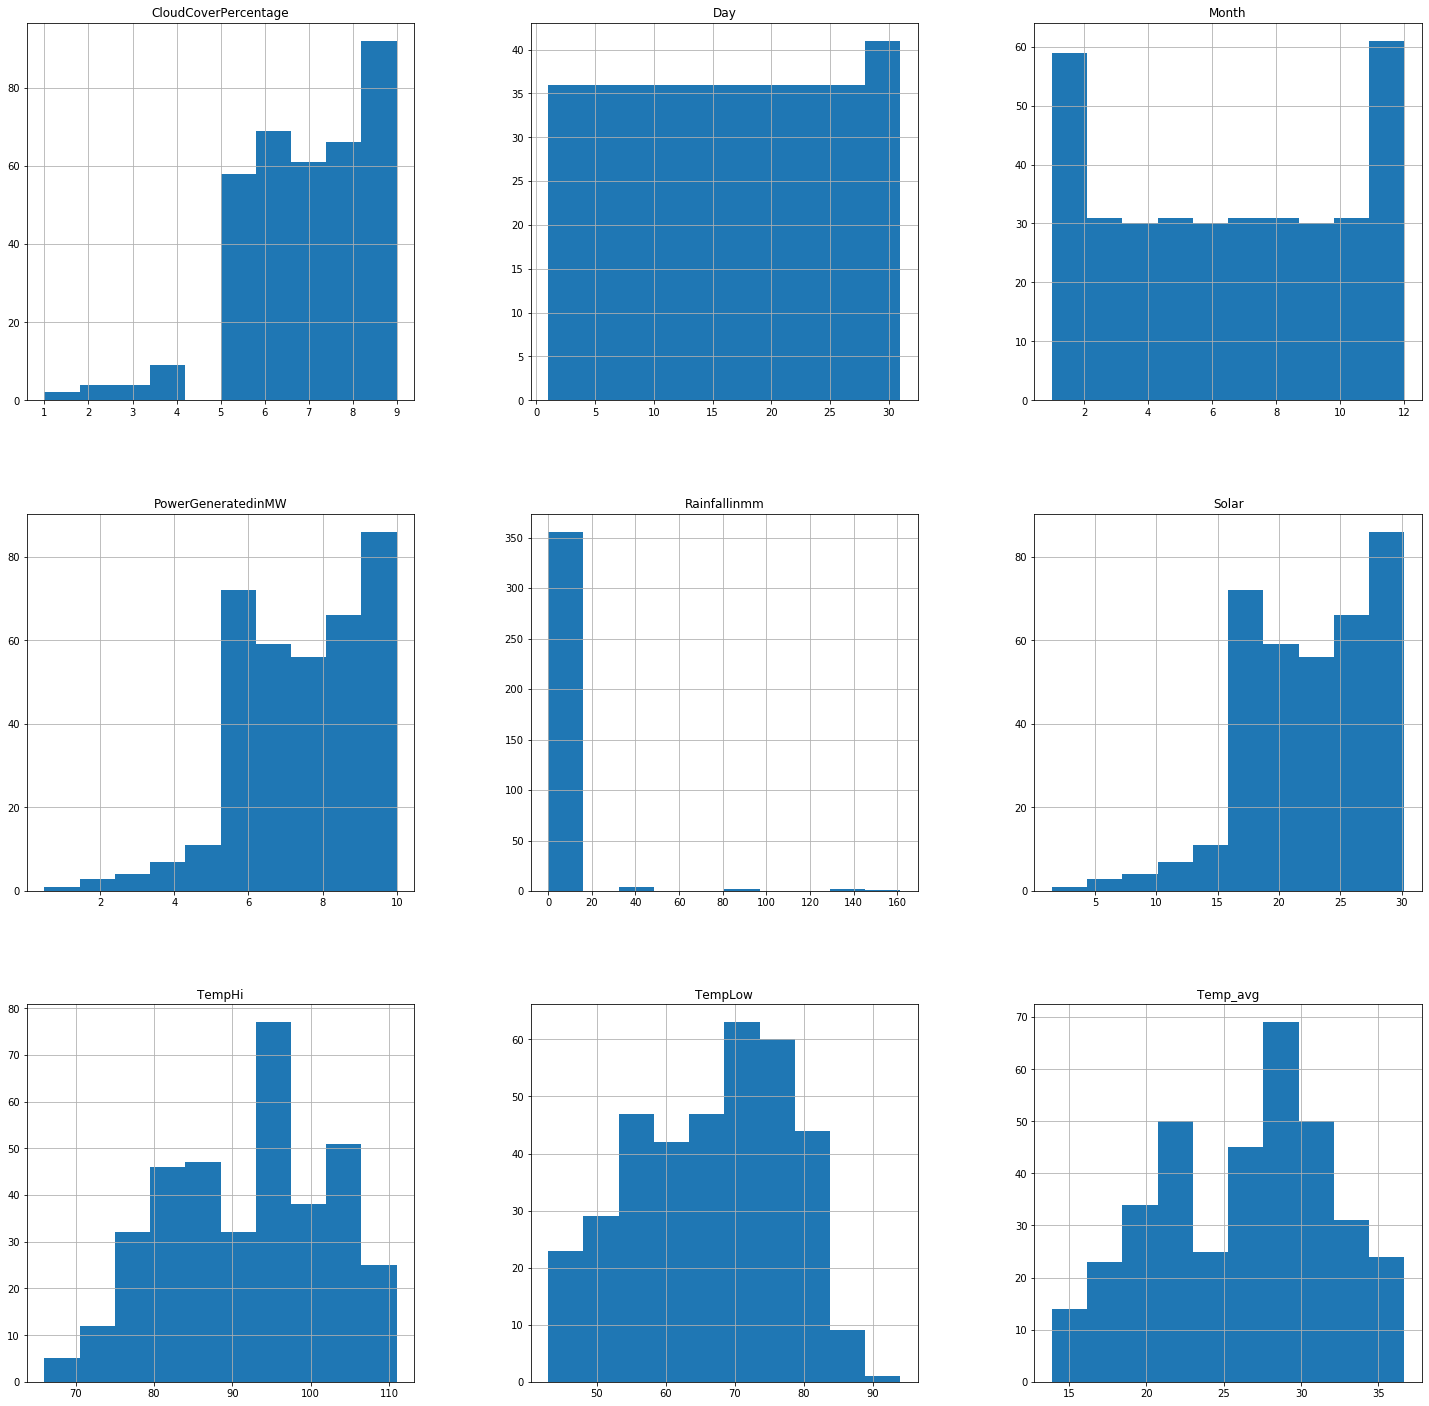

In [108]:
pd.DataFrame.hist(new_df, figsize=(25,25));

Text(0.5, 1.0, 'Box plot of Power Generated')

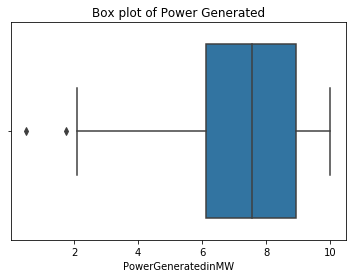

In [109]:
sns.boxplot(x='PowerGeneratedinMW', data=new_df)
plt.title('Box plot of Power Generated')

In [110]:
from matplotlib import pyplot

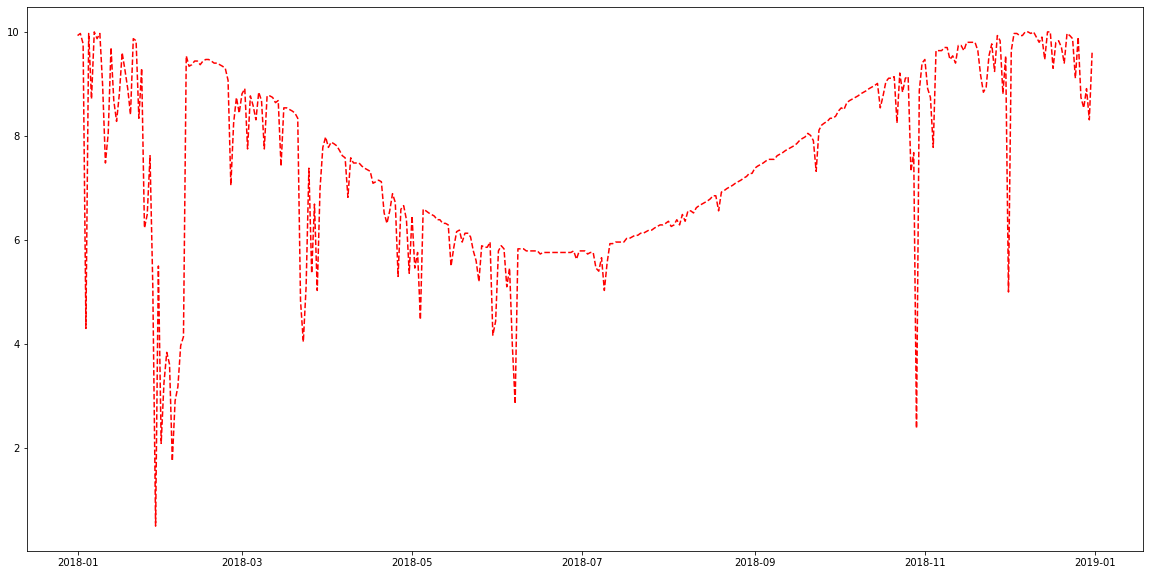

In [111]:
#date_= new_df['Date'].tolist()               #store the timestamp in a separate list to be used later
pyplot.figure(figsize=(20,10))               # set size of plot figure
pyplot.plot(new_df['Date'],                           # plto the time (x-axis) against
            new_df['PowerGeneratedinMW'],   # bitcoin closing price (y-axis)
            'r--') 

We check for correlation between our target and predictor variables before moving on to Modelling. 

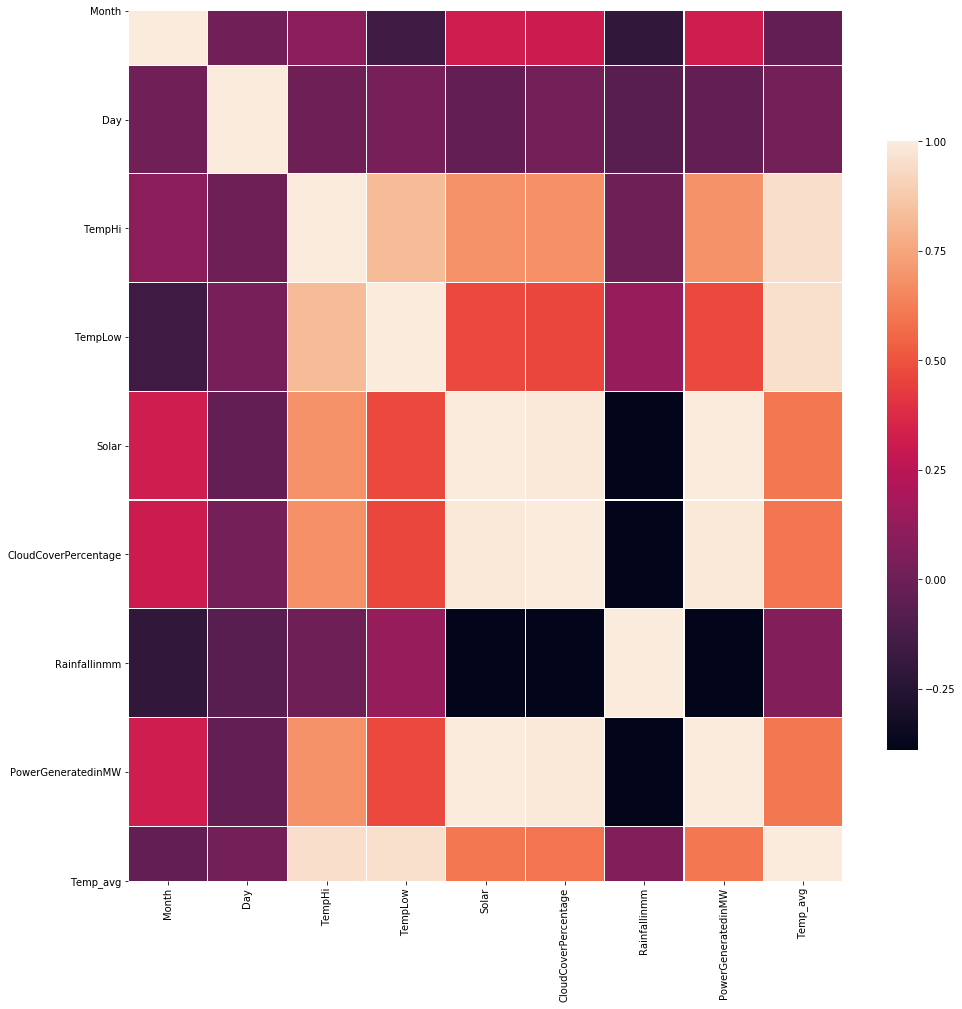

In [112]:
corr = new_df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,  
            linewidths=.1,                   # set linewidth between entries in matrix
           cbar_kws={"shrink": .7}) 

Training the Model

In [113]:
data_model=new_df.drop(['PowerGeneratedinMW','Date','Solar','TempHi','TempLow','Day', 'Month','Year'], axis=1) #drop the target variable and columns with string
X = data_model.values

In [114]:
y = new_df['PowerGeneratedinMW'].values

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [116]:
X = StandardScaler().fit_transform(X)

In [117]:
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Fit the model

In [118]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [119]:
predictions = lm.predict(X_test)

In [120]:
print(predictions[0:5])

[5.54632552 6.49551218 9.54005148 8.52993489 9.52940067]


Score the model

In [121]:
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
score

0.9698845267859032

In [122]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [123]:
kfold=KFold(n_splits=5,random_state=7)
results=cross_val_score(model, X, y.ravel(), cv=kfold)
print('Accuracy:', results.mean())

Accuracy: 0.8565971247808539


In [124]:
# pkl_filename = "model_filename.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(lm, file)

In [125]:
with open(r"C:\Users\Admin\Documents\AIIP\AppDev\Practice\model_solar.pkl", 'wb') as f_out:
    pickle.dump(lm,f_out)
f_out.close()

In [126]:
# print(model.predict[[27,5,0]])